In [5]:
from bias_correction import XBiasCorrection
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

time: 701 µs


In [4]:
obs_data = np.random.randn(2*365, 34, 65)
model_data = np.random.randn(2*365, 34, 65)
sce_data = np.random.randn(365, 34, 65)

lat = range(34)
lon = range(65)

obs_data = xr.DataArray(obs_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
model_data = xr.DataArray(model_data, dims=['time','lat','lon'], \
                          coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
sce_data = xr.DataArray(sce_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2019-01-01', '2019-12-31', freq='D'), lat, lon])

# combining dataarrays to form dataset with same timelength otherwise correction will give error
ds = xr.Dataset({'model_data':model_data,'obs_data':obs_data, 'sce_data':sce_data})
ds['sce_data']

<xarray.DataArray 'sce_data' (time: 1095, lat: 34, lon: 65)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       ...,

       [[-9.30012585e-01,  7.86417302e-01, -5.73805164e-01, ...,
         -2.08437416e+00, -6.66064463e-01, -4.85625705e-01],
        [ 2.11991635e+00,  9.29277126e-01, -1.13469434e+00, ...,
          7.19050788e-01, -6.25255995e-02,  3.10577715e-01],
        [-1.09293932e+00,  1.13351148e+00, -2.93205888e-01, ...,
          1.43012945e+00,  6.07713251e-02, -4.44879992e-01],
        ...,
        [-4.50666768e-01,  8.19132591e-01, -3.64354992e-01, ...,
         -1.08395752e+00, -1.36278511e+00, -1.56191499e+00],
        [-6.11915034e-01,  8.18145253e-01, -9.10463153e-01, ...,
         -1.46892985e+00,  1.63346927e+00,  1.28637228e+00],
        [ 9.51631291e-01,  2.21920622e+00,  2.17529618e-01, ...,
          9.27179120e-02,  9.13957029e-01, -1.01412703e+00]],

       [[ 7.88454899e-01,  1.40409320e+00,  1.17668160e+00, ...,
          4.42869047e-01, -8.76125636e-01, -2.33592166e+00],
        [-1.38737643e+00,  7.16690116e-04,  4.01246525e-01, ...,
          1.32975347e-01,  1.83467221e+00,  8.84387213e-01],
        [-1.04539499e+00, -7.66649597e-01, -3.92482221e-01, ...,
         -1.94605488e+00, -1.20967450e+00, -1.17528937e+00],
        ...,
        [ 1.59311699e+00,  7.78613094e-01,  7.11605601e-01, ...,
          2.24901880e-01,  2.75845016e-01,  8.83798543e-01],
        [ 2.01007471e-02, -1.74405140e+00,  5.91131198e-01, ...,
          7.03215075e-01, -7.61649971e-01,  8.91196283e-01],
        [-7.23903648e-02,  2.31231899e-01, -7.18965769e-01, ...,
          7.10364459e-01, -2.74333711e-01, -4.43752993e-01]],

       [[-1.44328701e+00, -3.17458684e-01,  6.06370793e-01, ...,
      

time: 277 ms


In [5]:
bc = XBiasCorrection(ds['obs_data'], ds['model_data'], ds['sce_data'])
# df1 = bc.correct(method='modified_quantile')
df2 = bc.correct(method='basic_quantile')
df3 = bc.correct(method='gamma_mapping')

time: 2min 33s


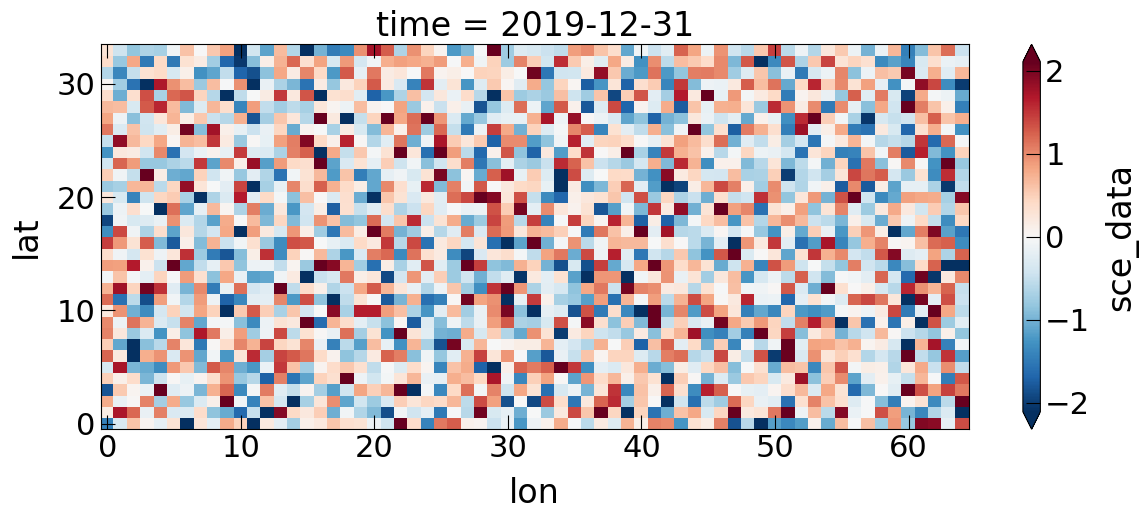

time: 270 ms


In [9]:
bc.sce_data.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()

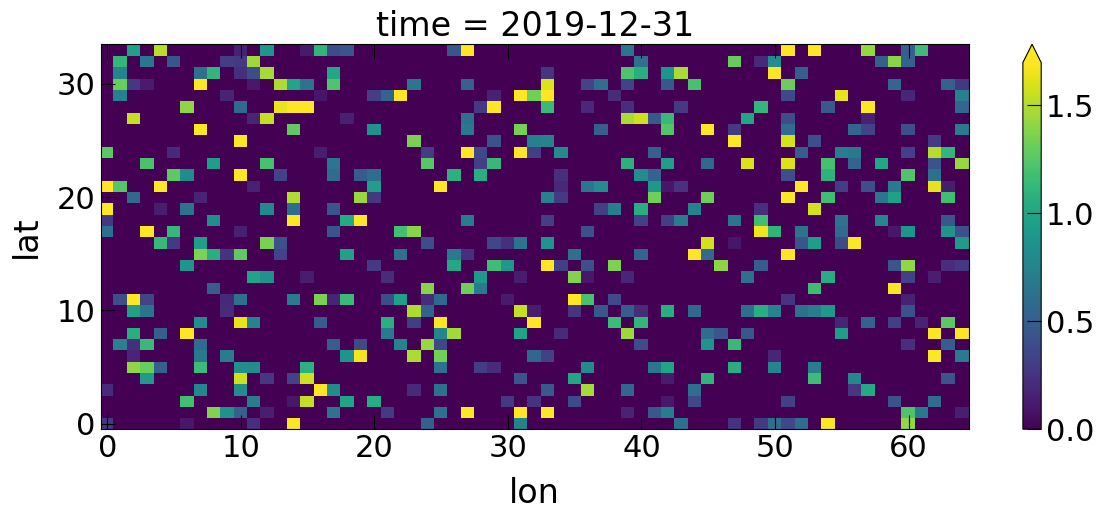

time: 303 ms


In [6]:
df3.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()